In [35]:
import graphviz

import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

### 과제 - 회귀분석

목표변수 FAT를 예측하기 위한 파생변수(BMI 등)를  생성하여 회귀분석을 실시하여 결과를 해석하고, predict method를 이용하여 예측값을 구하라.


#### 1. 데이터 구성하기

In [13]:
# 글씨체 분석
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False )

In [14]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/바탕화면/실습화일/2. Big Data 분석/체질검사.csv", encoding = "euc-kr")
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,363.15 lb,72.25 inch,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,168 lb,71.25 inch,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,177.75 lb,68.5 inch,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,147.75 lb,65.75 inch,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,219 lb,64 inch,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성


In [15]:
# 결측치 확인
df_raw.isnull().sum()

FAT        0
AGE        0
WEIGHT     0
HEIGHT     0
NECK       0
CHEST      0
ABDOMEN    0
HIP        0
THIGH      0
KNEE       0
ANKLE      0
BICEPS     0
FOREARM    0
WRIST      0
GENDER     0
dtype: int64

In [16]:
# weight, height 숫자형태로 변환
df_raw[["WEIGHT", "WEIGHT_UNIT"]] = df_raw["WEIGHT"].str.split(expand = True)
df_raw[["HEIGHT", "HEIGHT_UNIT"]] = df_raw["HEIGHT"].str.split(expand = True)
df_raw["WEIGHT"] = df_raw["WEIGHT"].astype('float64')*0.45
df_raw["HEIGHT"] = df_raw["HEIGHT"].astype('float64')*2.54
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FAT          252 non-null    float64
 1   AGE          252 non-null    int64  
 2   WEIGHT       252 non-null    float64
 3   HEIGHT       252 non-null    float64
 4   NECK         252 non-null    float64
 5   CHEST        252 non-null    float64
 6   ABDOMEN      252 non-null    float64
 7   HIP          252 non-null    float64
 8   THIGH        252 non-null    float64
 9   KNEE         252 non-null    float64
 10  ANKLE        252 non-null    float64
 11  BICEPS       252 non-null    float64
 12  FOREARM      252 non-null    float64
 13  WRIST        252 non-null    float64
 14  GENDER       252 non-null    object 
 15  WEIGHT_UNIT  252 non-null    object 
 16  HEIGHT_UNIT  252 non-null    object 
dtypes: float64(13), int64(1), object(3)
memory usage: 33.6+ KB


In [17]:
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER,WEIGHT_UNIT,HEIGHT_UNIT
0,35.2,46,163.4175,183.515,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성,lb,inch
1,11.8,27,75.6000,180.975,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성,lb,inch
2,22.2,69,79.9875,173.990,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성,lb,inch
3,10.6,57,66.4875,167.005,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성,lb,inch
4,47.5,51,98.5500,162.560,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성,lb,inch


In [18]:
# BMI 계산하여 새로운 행으로 만들어줌
df_raw['BMI'] = 10000 * df_raw['WEIGHT']/(df_raw['HEIGHT']*df_raw['HEIGHT'])
df_raw = df_raw.drop(['WEIGHT', 'HEIGHT' , 'WEIGHT_UNIT', 'HEIGHT_UNIT'], axis =1)

In [19]:
df_raw.head()

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER,BMI
0,35.2,46,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성,48.523870
1,11.8,27,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성,23.082595
2,22.2,69,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성,26.422478
3,10.6,57,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성,23.838617
4,47.5,51,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성,37.293165


In [20]:
# 성별 0,1로 바꿈
df_raw['GENDER']=df_raw['GENDER'].replace('남성',0)
df_raw['GENDER']=df_raw['GENDER'].replace('여성',1)
df_raw.head()

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER,BMI
0,35.2,46,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,0,48.523870
1,11.8,27,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,0,23.082595
2,22.2,69,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,0,26.422478
3,10.6,57,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,1,23.838617
4,47.5,51,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,1,37.293165


In [21]:
# 그냥 숫자 0,1 에서 더미변수 0,1로 변경
df_raw_dummy = pd.get_dummies(df_raw, drop_first = False)
df_raw_dummy.head()

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER,BMI
0,35.2,46,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,0,48.523870
1,11.8,27,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,0,23.082595
2,22.2,69,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,0,26.422478
3,10.6,57,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,1,23.838617
4,47.5,51,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,1,37.293165


#### 2. 변수 간의 경향성 파악 : 그래프 분석

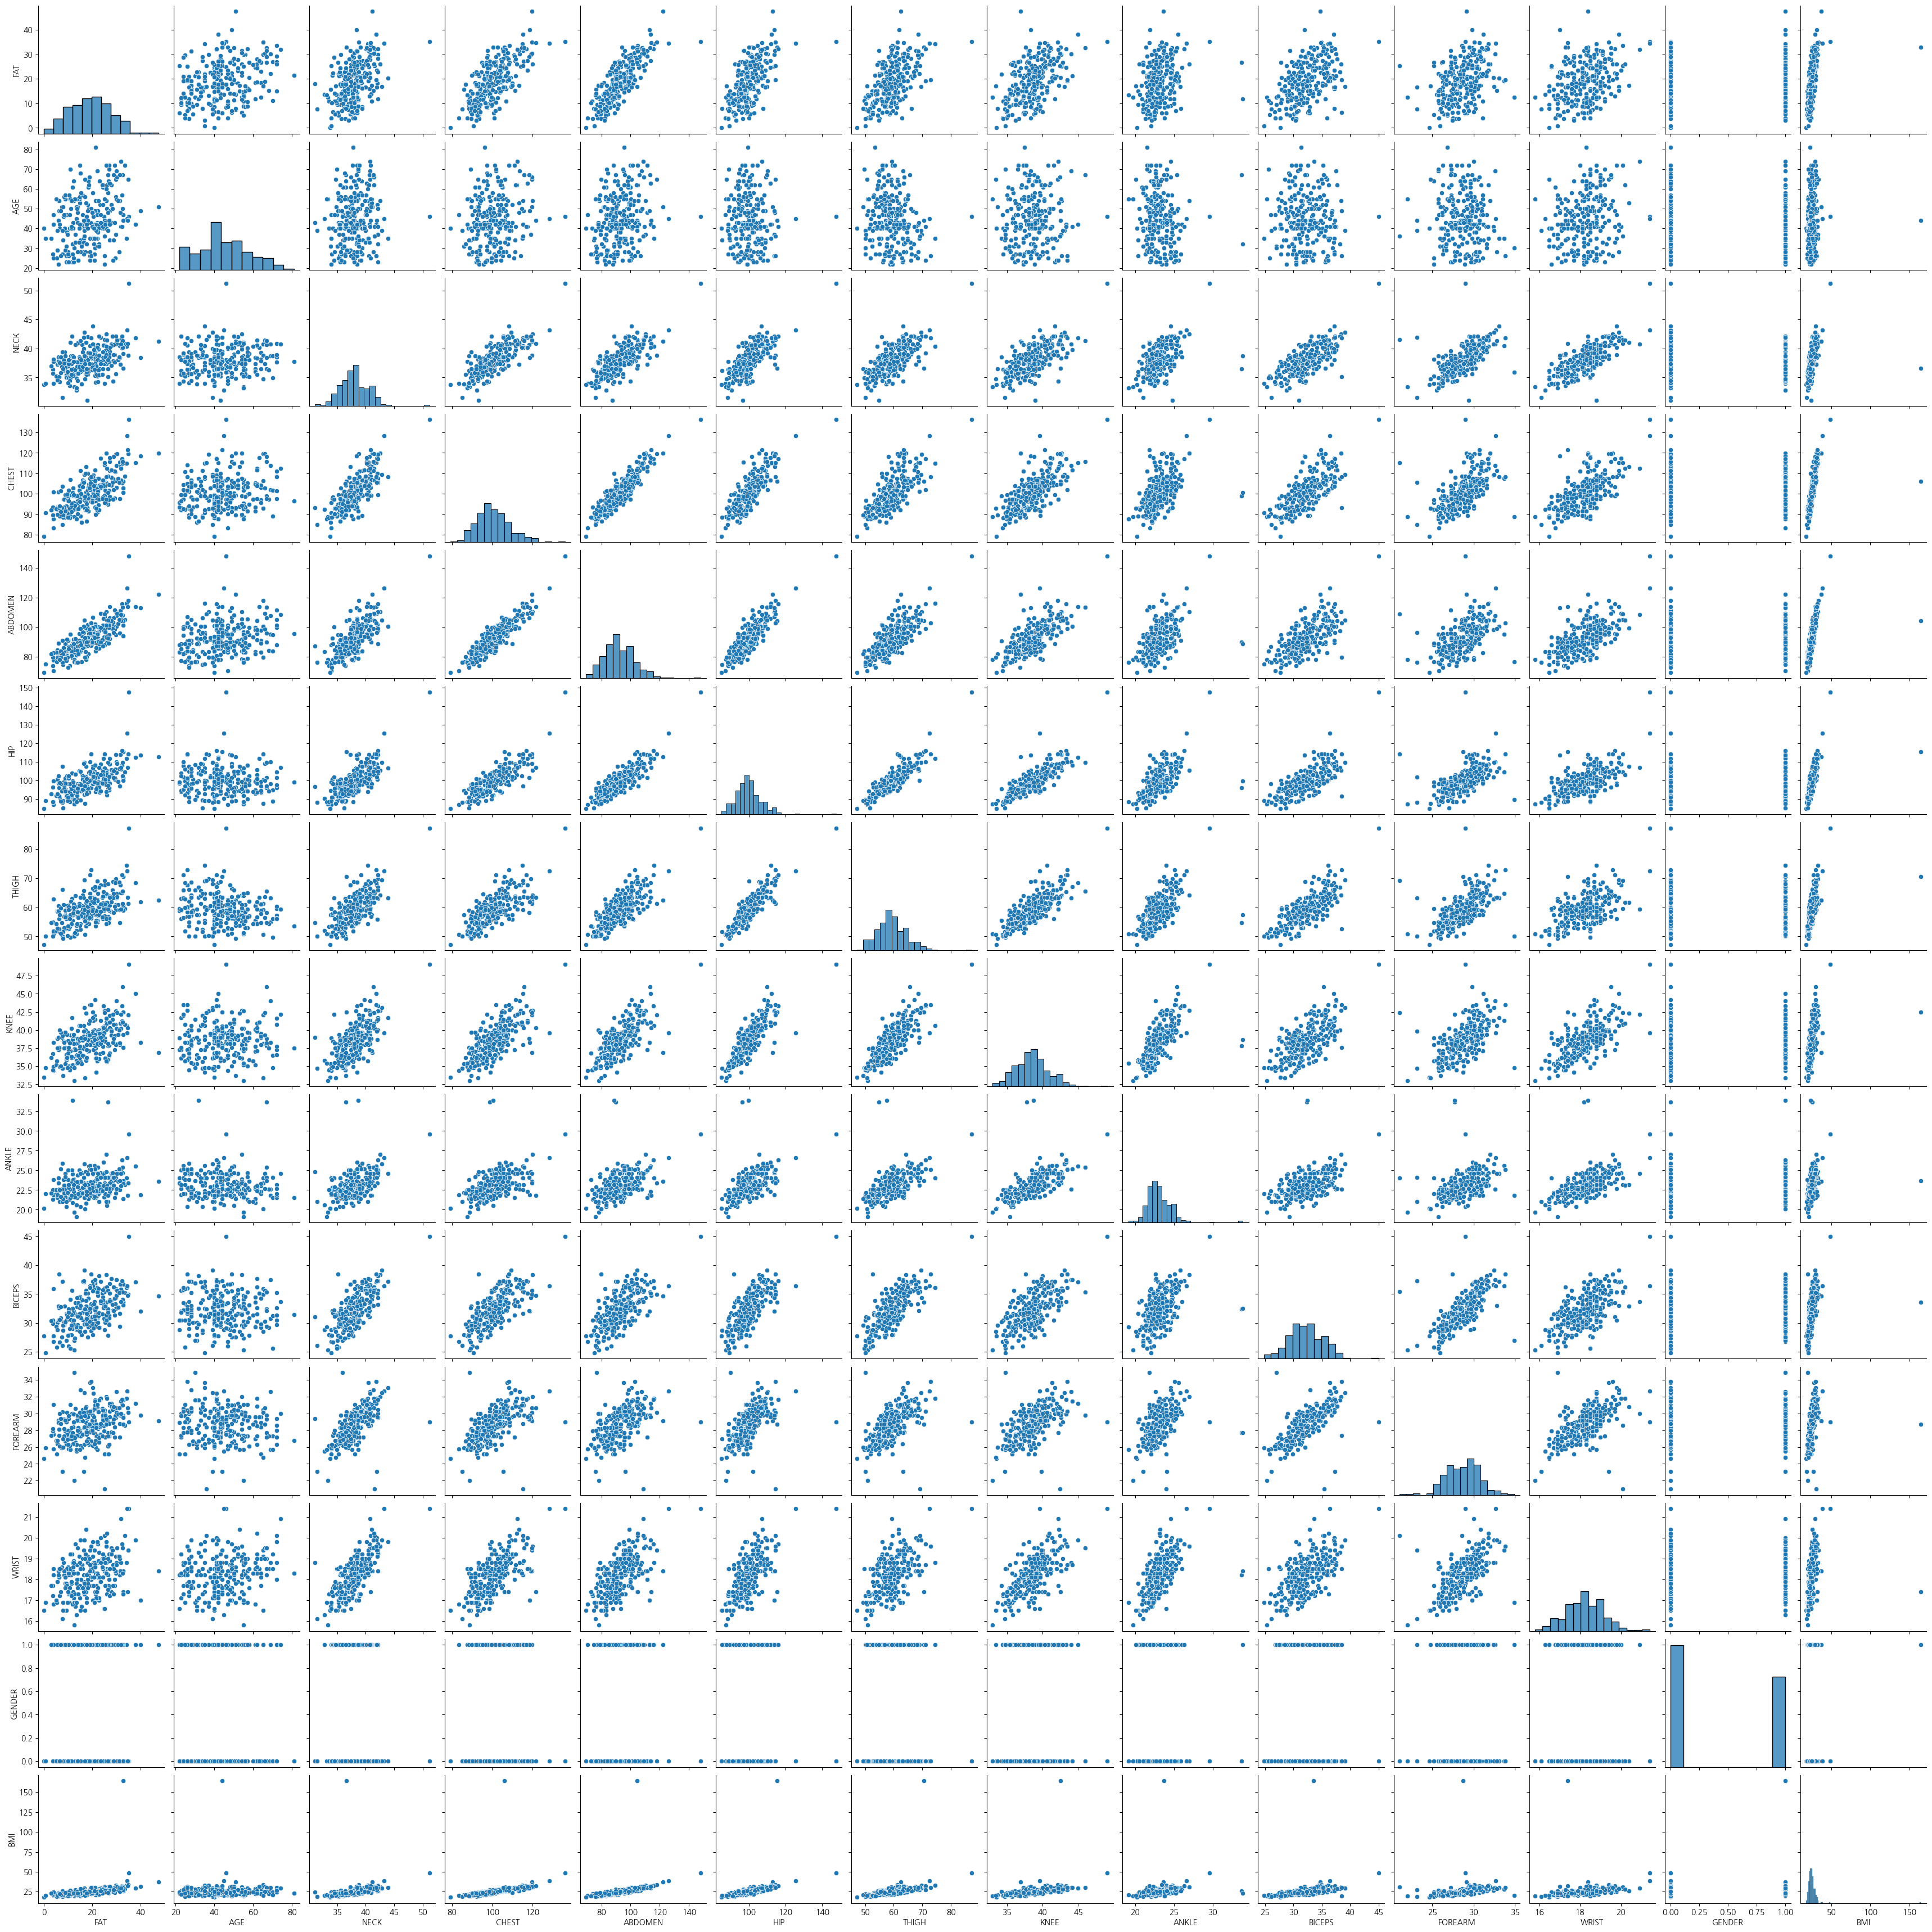

In [23]:
# 그래프로 경향성 확인해보기

sns.pairplot(df_raw_dummy)

In [24]:
# 피어슨 상관계수로 경향성 확인

df_raw_dummy.corr(method = "pearson").round(3)

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER,BMI
FAT,1.000,0.291,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347,-0.033,0.371
AGE,0.291,1.000,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214,-0.063,0.040
NECK,0.491,0.114,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745,0.010,0.266
CHEST,0.703,0.176,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660,-0.014,0.383
ABDOMEN,0.813,0.230,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620,-0.017,0.415
HIP,0.625,-0.050,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630,-0.042,0.462
THIGH,0.560,-0.200,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559,-0.040,0.433
KNEE,0.509,0.018,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665,-0.034,0.364
ANKLE,0.266,-0.105,0.478,0.483,0.453,0.558,0.540,0.612,1.000,0.485,0.419,0.566,-0.012,0.210
BICEPS,0.493,-0.041,0.731,0.728,0.685,0.739,0.761,0.679,0.485,1.000,0.678,0.632,0.040,0.311


- 상관계수를 비교해본 결과 chest와 abdomen이 목표변수 fat과 높은 상관관계를 가지고 있다고 볼 수 있다.

#### 3. 회귀 모델 생성

In [125]:
# 훈련 데이터와 검정 데이터를 6:4 비율로 분할
df_train, df_test = train_test_split(df_raw_dummy, test_size = 0.4 , random_state = 7777)
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (151, 14)
test data size : (101, 14)


In [131]:
# 선형 회귀 분석

reg_model = smf.ols(formula = "FAT ~ AGE + NECK + CHEST + ABDOMEN + HIP + THIGH + \
KNEE + ANKLE + BICEPS + FOREARM + WRIST + GENDER + BMI", data = df_train)

In [132]:
# 적합

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     31.05
Date:                Mon, 15 May 2023   Prob (F-statistic):           1.67e-34
Time:                        22:00:08   Log-Likelihood:                -435.55
No. Observations:                 151   AIC:                             899.1
Df Residuals:                     137   BIC:                             941.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2354      9.002      0.470      0.6

- 회귀검정에서 p-value값이 높으면, 회귀계수가 0일 확률이 더 높아지므로 p값이 가장 큰 THIGH 변수를 제거해준다.

##### 회귀계수 검정

- H0 : 회귀계수가 0이다.
- H1 : 회귀계수가 0이 아니다.

회귀계수 검정에 대한 p-value 값을 확인해보면, 유의수준 5% 에서 NECK, ABDOMEN, WRIST 3가지 변수에 대해서는 귀무가설을 기각하고, 나머지 변수들은 귀무가설을 채택할 수 있다.

정리하자면 신뢰구간 95%에서 NECK, ABDOMEN, WRIST 3가지의 변수는 목표변수인 FAT과 유의미한 관계가 있고, 나머지 변수들은 FAT 변수와 관계가 없다고 볼 수 있다. 

변수를 삭제할 때 하나씩 삭제해야 하므로, p-value값이 가장 큰 THIGH를 삭제한다. 

In [134]:
# 모델에서 p-value값이 가장 높은 THIGH을 삭제해줌
reg_model = smf.ols(formula = "FAT ~ AGE + NECK + CHEST + ABDOMEN + HIP + \
KNEE + ANKLE + BICEPS + FOREARM + WRIST + GENDER + BMI", data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     33.88
Date:                Mon, 15 May 2023   Prob (F-statistic):           2.81e-35
Time:                        22:01:14   Log-Likelihood:                -435.56
No. Observations:                 151   AIC:                             897.1
Df Residuals:                     138   BIC:                             936.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2610      8.964      0.475      0.6

##### 회귀검정 (THIGH 제외)
THIGH 변수를 삭제하고 다시 회귀검정을 한 결과, 위와 같이 나왔다. 

변수를 삭제할 때 하나씩 삭제해야 하므로, p-value값이 가장 큰 GENDER를 삭제한다.

In [135]:
# 모델에서 p-value값이 가장 높은 GENDER을 삭제해줌
reg_model = smf.ols(formula = "FAT ~ AGE + NECK + CHEST + ABDOMEN + HIP + \
KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI", data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     37.22
Date:                Mon, 15 May 2023   Prob (F-statistic):           4.50e-36
Time:                        22:01:43   Log-Likelihood:                -435.56
No. Observations:                 151   AIC:                             895.1
Df Residuals:                     139   BIC:                             931.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1455      8.805      0.471      0.6

##### 회귀검정 (THIGH,  GENDER 제외)

THIGH,GENDER 변수를 삭제하고 다시 회귀검정을 한 결과, 위와 같이 나왔다.

변수를 삭제할 때 하나씩 삭제해야 하므로, p-value값이 가장 큰 ANKLE를 삭제한다.


In [136]:
# 모델에서 p-value값이 가장 높은 ANKLE을 삭제해줌
reg_model = smf.ols(formula = "FAT ~ AGE + NECK + CHEST + ABDOMEN + HIP + \
KNEE + BICEPS + FOREARM + WRIST + BMI", data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     41.15
Date:                Mon, 15 May 2023   Prob (F-statistic):           7.62e-37
Time:                        22:02:08   Log-Likelihood:                -435.68
No. Observations:                 151   AIC:                             893.4
Df Residuals:                     140   BIC:                             926.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2000      8.780      0.478      0.6

##### 회귀검정 (THIGH, GENDER, ANKLE 제외)

THIGH,GENDER,ANKLE 변수를 삭제하고 다시 회귀검정을 한 결과, 위와 같이 나왔다.

변수를 삭제할 때 하나씩 삭제해야 하므로, p-value값이 가장 큰 CHEST를 삭제한다.

In [154]:
# 모델에서 p-value값이 가장 높은 CHEST을 삭제해줌
reg_model = smf.ols(formula = "FAT ~ AGE + NECK + ABDOMEN + HIP + \
KNEE + BICEPS + FOREARM + WRIST + BMI", data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     45.94
Date:                Mon, 15 May 2023   Prob (F-statistic):           1.22e-37
Time:                        22:32:57   Log-Likelihood:                -435.81
No. Observations:                 151   AIC:                             891.6
Df Residuals:                     141   BIC:                             921.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3320      8.574      0.389      0.6

##### 회귀검정 (THIGH, GENDER, ANKLE, CHEST 제외)

THIGH,GENDER,ANKLE,CHEST 변수를 삭제하고 다시 회귀검정을 한 결과, 위와 같이 나왔다.

변수를 삭제할 때 하나씩 삭제해야 하므로, p-value값이 가장 큰 KNEE를 삭제한다.


In [138]:
# 모델에서 p-value값이 가장 높은 KNEE을 삭제해줌
reg_model = smf.ols(formula = "FAT ~ AGE + NECK + ABDOMEN + HIP + \
BICEPS + FOREARM + WRIST + BMI", data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     51.69
Date:                Mon, 15 May 2023   Prob (F-statistic):           2.36e-38
Time:                        22:02:47   Log-Likelihood:                -436.20
No. Observations:                 151   AIC:                             890.4
Df Residuals:                     142   BIC:                             917.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9593      8.415      0.233      0.8

##### 회귀검정 (THIGH, GENDER, ANKLE, CHEST, KNEE 제외)

THIGH,GENDER,ANKLE,KNEE 변수를 삭제하고 다시 회귀검정을 한 결과, 위와 같이 나왔다.

변수를 삭제할 때 하나씩 삭제해야 하므로, p-value값이 가장 큰 BICEPS를 삭제한다.

In [155]:
# 모델에서 p-value값이 가장 높은 BICEPS를 삭제해줌
reg_model = smf.ols(formula = "FAT ~ AGE + NECK + ABDOMEN + HIP + \
FOREARM + WRIST + BMI", data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     59.08
Date:                Mon, 15 May 2023   Prob (F-statistic):           4.22e-39
Time:                        22:33:40   Log-Likelihood:                -436.59
No. Observations:                 151   AIC:                             889.2
Df Residuals:                     143   BIC:                             913.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0170      8.095      0.002      0.9

##### 회귀검정 (THIGH, GENDER, ANKLE, KNEE, BICEPS 제외)

THIGH,GENDER,ANKLE,KNEE,BICEPS 변수를 삭제하고 다시 회귀검정을 한 결과, 위와 같이 나왔다.

변수를 삭제할 때 하나씩 삭제해야 하므로, p-value값이 가장 큰 BMI를 삭제하려고 했으나, BMI는  몸무게/(키*키) 이기 때문에 몸무게와 연관이 있다고 생각하였다.

그리하여 BMI 변수는 삭제하지않고 다음으로 p-value가 큰 AGE 변수를 삭제하였다.

In [146]:
# 모델에서 p-value값이 가장 높은 AGE을 삭제해줌
reg_model = smf.ols(formula = "FAT ~ NECK + ABDOMEN + HIP + \
FOREARM + WRIST + BMI", data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     67.38
Date:                Mon, 15 May 2023   Prob (F-statistic):           2.32e-39
Time:                        22:07:20   Log-Likelihood:                -438.25
No. Observations:                 151   AIC:                             890.5
Df Residuals:                     144   BIC:                             911.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7324      7.708      0.614      0.5

##### 회귀검정 (THIGH, GENDER, ANKLE, KNEE, BICEPS, AGE 제외)

THIGH,GENDER,ANKLE,KNEE,BICEPS,AGE 변수를 삭제하고 다시 회귀검정을 한 결과, 위와 같이 나왔다.

유의수준 5%로 검정했을때, 남아있는 모든 변수들의 p-value가 모두 유의수준 보다 낮기 때문에 목표변수인 FAT과 유의미한 관계가 있다고 판단한다.

따라서 아무 변수도 삭제하지 않는다.

-------------------------------------------------

##### 다중공선성 확인

x변수들 간의 상관성이 있는지 확인하기 위해, 다중공선성 분석을 해본 결과, 남아있는 모든 변수들이 10이하의 값을 가진 것을 확인할 수 있었다.
 
다른 데이터에 큰 영향을 끼칠 정도로 상관성이 높은 변수는 없는 것으로 판단하고, 아무 변수도 삭제하지 않는다.

In [147]:
# 다중공선성 확인

df_train_x = df_train[['NECK' , 'ABDOMEN' , 'HIP' , 'FOREARM', 'WRIST' ,'BMI']] # y변수 삭제 (x변수 간의 상관성을 확인하기 위함)
df_train_x_const = add_constant(df_train_x) # 상수항 추가

df_vif =pd.DataFrame() # 빈 데이터 프레임 생성
df_vif["variable"] = df_train_x_const.columns  # variable 열에 train_x의 열 제목을 다 담아줌
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])] # VIF 열에 다중공선성

df_vif.sort_values("VIF", ascending = True).round(2)  # VIF 정렬

,variable,VIF
6,BMI,1.32
4,FOREARM,1.85
5,WRIST,2.73
1,NECK,3.97
2,ABDOMEN,4.77
3,HIP,5.03
0,const,440.34


##### 등분산성 검정

랜덤하게 데이터가 고르게 분산되어 있는 것을 확인할 수 있기 때문에, 등분산성이 있는 데이터로 볼 수 있다.

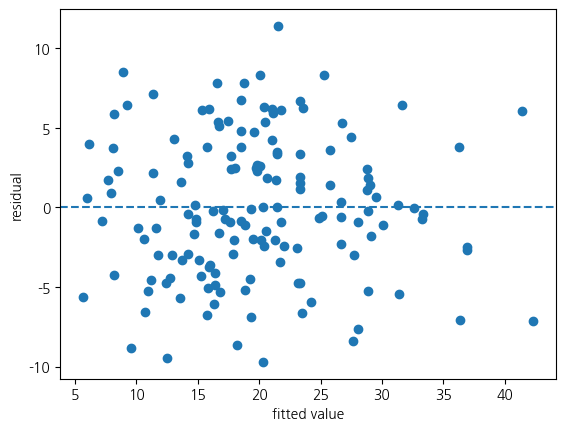

In [148]:
# 등분산성 검정
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.axhline(y=0 , linestyle = "--")


##### 정규성 검정

정규분포 직선을 중심으로 분포하므로 해당 데이터가 정규분포를 따른다고 볼 수 있다.

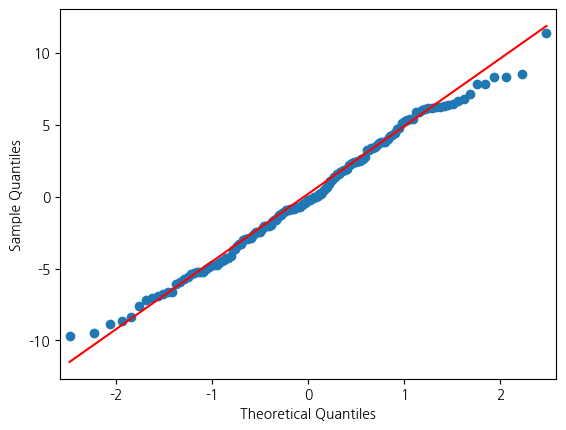

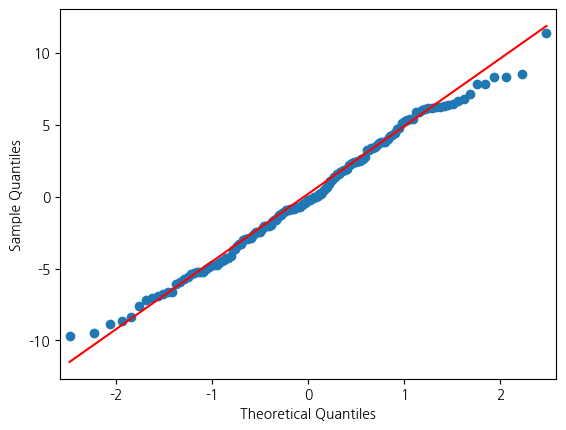

In [149]:
# 정규성 검정
qqplot(reg_result.resid, line = 'q')

#### 잔차의 독립성 확인

상한, 하한 범위인 +-3시그마 안으로 데이터들이 다 모여있고, 특별한 이상치 없이 랜덤하고 고르게 산포되어 있으므로 독립성을 만족한다고 볼 수 있다.

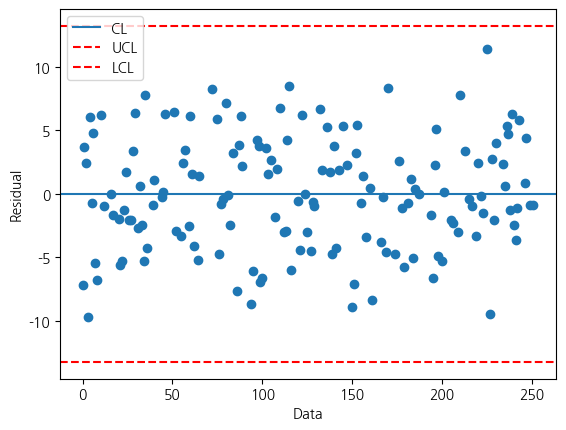

In [150]:
# 잔차의 독립성 확인
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel('Data') ; plt.ylabel('Residual')
plt.axhline(y=0 , linestyle = "-", label = 'CL')
plt.axhline(y=3*np.std(reg_result.resid), linestyle="--", color="red", label="UCL")
plt.axhline(y=-3*np.std(reg_result.resid), linestyle="dashed", color="red", label="LCL")
plt.legend()

##### 회귀모델 생성하기

['NECK','ABDOMEN','HIP','FOREARM','WRIST','BMI'] 6가지 변수를 가지고 훈련데이터를 통해 회귀모델을 만들어 보았다. 훈련데이터의 결정계수는 0.73으로 적절한 모델의 성능을 보인다.

테스트 데이터로도 검정했을 때 결정계수가 0.71로 훈련데이터와 크게 차이나지 않는다. 따라서 overfitting 되지않은 모델이라고 판단할 수 있다.


In [151]:
# 회귀 모델 생성 
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수:", r2_score(df_train['FAT'], train_pred))
print("test data의 결정계수:", r2_score(df_test['FAT'], test_pred))

train data의 결정계수: 0.7373587260547918
test data의 결정계수: 0.712652429452218


#### 4. 결론

변수의 회귀계수는 아래와 같다.

NECK : -0.7661 <br>
ABDOMEN : 0.9793 <br>
HIP : -0.3861 <br>
FOREARM : 0.4957 <br>
WRIST :-1.2954 <br>
BMI : 0.0449 <br>         

따라서 목,엉덩이,손목은 얇을 수록 비만도가 증가하고, 복부,전완,BMI는 클수록 비만도가 높다고 볼 수 있다.

<Axes: >

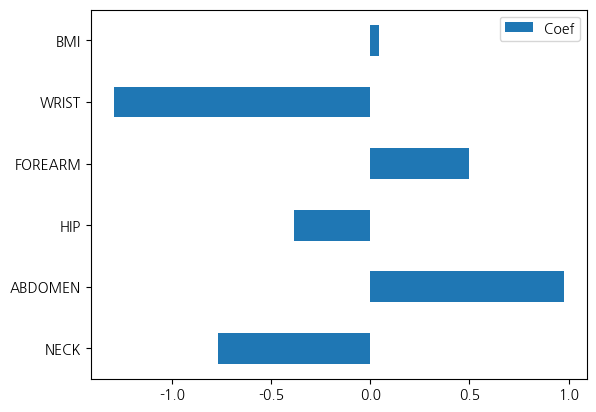

In [153]:
# 설명변수 중요도
df_reg_coef = pd.DataFrame({'Coef' : reg_result.params.values[1:]},
                          index = ['NECK' , 'ABDOMEN' , 'HIP' , 'FOREARM', 'WRIST' ,'BMI'])
df_reg_coef.plot.barh(y = 'Coef')